In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [157]:
phl = pd.read_csv('datasets/phl_hec_all_confirmed.csv', error_bad_lines=False) # 3873
phl.head()

b'Skipping line 3742: expected 68 fields, saw 69\nSkipping line 3743: expected 68 fields, saw 69\n'


,P. Name,P. Name Kepler,P. Name KOI,P. Zone Class,P. Mass Class,P. Composition Class,P. Atmosphere Class,P. Habitable Class,P. Min Mass (EU),P. Mass (EU),P. Max Mass (EU),P. Radius (EU),P. Density (EU),P. Gravity (EU),P. Esc Vel (EU),P. SFlux Min (EU),P. SFlux Mean (EU),P. SFlux Max (EU),P. Teq Min (K),P. Teq Mean (K),P. Teq Max (K),P. Ts Min (K),P. Ts Mean (K),P. Ts Max (K),P. Surf Press (EU),P. Mag,P. Appar Size (deg),P. Period (days),P. Sem Major Axis (AU),P. Eccentricity,P. Mean Distance (AU),P. Inclination (deg),P. Omega (deg),S. Name,S. Name HD,S. Name HIP,S. Constellation,S. Type,S. Mass (SU),S. Radius (SU),S. Teff (K),S. Luminosity (SU),S. [Fe/H],S. Age (Gyrs),S. Appar Mag,S. Distance (pc),S. RA (hrs),S. DEC (deg),S. Mag from Planet,S. Size from Planet (deg),S. No. Planets,S. No. Planets HZ,S. Hab Zone Min (AU),S. Hab Zone Max (AU),P. HZD,P. HZC,P. HZA,P. HZI,P. SPH,P. Int ESI,P. Surf ESI,P. ESI,S. HabCat,P. Habitable,P. Hab Moon,P. Confirmed,P. Disc. Method,P. Disc. Year
0,1RXS 1609 b,NaN,NaN,Cold,Jovian,gas,hydrogen-rich,non-habitable,NaN,4451.16,NaN,19.04,0.64,12.28,15.29,4.079750e-06,4.079751e-06,4.079751e-06,11.4,11.4,11.4,NaN,NaN,NaN,2870.4,-10.06,36.81,NaN,330.0,0.0,330.0,NaN,0.0,1RXS 1609,NaN,NaN,Sco,K7V,0.73,1.35,4060.0,0.444285,NaN,0.011,NaN,145.0,16.1583,-21.0828,-13.2,0.0022,1,0,0.540,1.362,800.07,23.51,85.62,0.00,NaN,0.0,0.0,0.05,0,0,0,1,Imaging,2008.00
1,1SWASP J1407 b,NaN,NaN,Cold,Jovian,gas,hydrogen-rich,non-habitable,6358.80,6358.80,NaN,10.94,4.86,53.12,24.11,0.02166914,0.02166914,0.02166914,97.7,97.7,97.7,NaN,NaN,NaN,30873.8,-18.21,20.91,3725.0,3.9,0.0,3.9,NaN,0.0,1SWASP J1407,NaN,NaN,Cen,K,0.90,0.99,4400.0,0.329588,NaN,0.016,12.4,133.0,14.1300,-39.7619,-22.5,0.1353,1,0,0.461,1.143,9.07,15.30,45.41,0.02,NaN,0.0,0.0,0.07,0,0,0,1,Primary Transit,2012.00
2,2M 0103-55(AB) b,NaN,NaN,Cold,Jovian,gas,hydrogen-rich,non-habitable,4133.22,4133.22,NaN,11.40,2.79,31.79,19.04,3.961934e-06,3.961934e-06,3.961935e-06,11.4,11.4,11.4,NaN,NaN,NaN,11520.8,-8.91,21.80,NaN,84.0,0.0,84.0,NaN,0.0,2M 0103-55(AB),NaN,NaN,Phe,M,0.40,0.38,3840.0,0.027955,NaN,0.030,NaN,47.2,1.0600,-55.2656,-13.2,0.0024,1,0,0.136,0.347,793.67,12.57,107.44,0.00,NaN,0.0,0.0,0.06,0,0,0,1,Imaging,2013.00
3,2M 0122-24 b,NaN,NaN,Cold,Jovian,gas,hydrogen-rich,non-habitable,NaN,6358.80,NaN,11.20,4.53,50.69,23.83,1.033854e-05,1.033854e-05,1.033854e-05,14.4,14.4,14.4,NaN,NaN,NaN,28780.4,-9.92,21.41,NaN,52.0,0.0,52.0,NaN,0.0,2M 0122-24,NaN,NaN,Cet,M3.5,0.40,0.38,3840.0,0.027955,NaN,0.120,NaN,36.0,1.3808,-24.6142,-14.2,0.0039,1,0,0.136,0.347,490.45,15.72,119.46,0.00,NaN,0.0,0.0,0.08,0,0,0,1,Imaging,2013.00
4,2M 0219-39 b,NaN,NaN,Cold,Jovian,gas,hydrogen-rich,non-habitable,NaN,4419.37,NaN,16.13,1.05,16.99,16.55,2.368772e-07,2.368772e-07,2.368773e-07,5.6,5.6,5.6,NaN,NaN,NaN,4655.6,-6.60,31.03,NaN,156.0,0.0,156.0,NaN,0.0,2M 0219-39,NaN,NaN,For,M6,0.11,0.27,3064.0,0.005765,NaN,NaN,NaN,39.4,2.3228,-39.4231,-10.1,0.0009,1,0,0.062,0.165,3028.82,19.46,133.25,0.00,NaN,0.0,0.0,0.06,0,0,0,1,Imaging,2015.00


In [158]:
phl.shape

(3873, 68)

## Removing Nans and not needed information

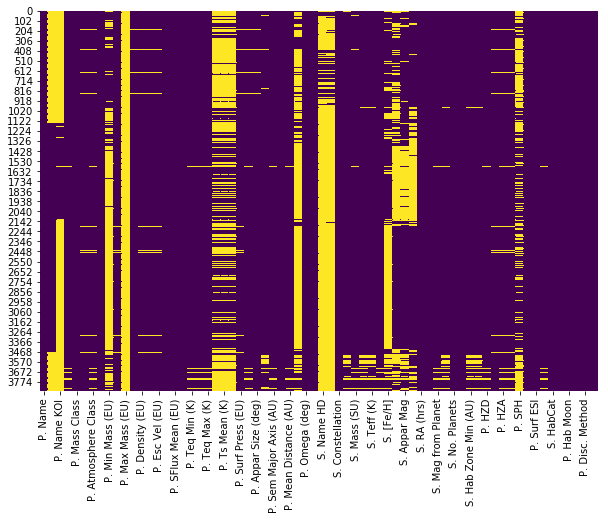

In [159]:
plt.figure(figsize=(10,7))
sns.heatmap(phl.isnull(), cbar = False, cmap='viridis')

In [160]:
# Removing columns with information we won't use

phl.drop(['P. Name Kepler', 'P. Int ESI', 'P. Surf ESI', 'S. HabCat', 'P. SPH', 'S. Size from Planet (deg)', 'S. Mag from Planet', 'S. Appar Mag', 'P. Omega (deg)', 'S. Name HIP', 'S. [Fe/H]', 'P. Inclination (deg)', 'P. Name KOI', 'S. Name HD', 'P. Min Mass (EU)', 'P. Max Mass (EU)', 'P. SFlux Min (EU)', 'P. SFlux Max (EU)', 'P. Teq Min (K)', 'P. Teq Max (K)', 'P. Ts Min (K)', 'P. Ts Max (K)'], axis=1, inplace=True)

In [161]:
phl.isnull().sum()

P. Name                      0
P. Zone Class               46
P. Mass Class                6
P. Composition Class        41
P. Atmosphere Class         85
P. Habitable Class           0
P. Mass (EU)                33
P. Radius (EU)              12
P. Density (EU)             41
P. Gravity (EU)             41
P. Esc Vel (EU)             41
P. SFlux Mean (EU)           0
P. Teq Mean (K)             46
P. Ts Mean (K)            2125
P. Surf Press (EU)          41
P. Mag                      56
P. Appar Size (deg)         12
P. Period (days)           150
P. Sem Major Axis (AU)      35
P. Eccentricity              0
P. Mean Distance (AU)       35
S. Name                      0
S. Constellation             0
S. Type                     84
S. Mass (SU)                47
S. Radius (SU)             112
S. Teff (K)                 99
S. Luminosity (SU)          28
S. Age (Gyrs)             1551
S. Distance (pc)          1187
S. RA (hrs)                  0
S. DEC (deg)                 0
S. No. P

In [162]:
phl.dtypes

P. Name                    object
P. Zone Class              object
P. Mass Class              object
P. Composition Class       object
P. Atmosphere Class        object
P. Habitable Class         object
P. Mass (EU)              float64
P. Radius (EU)            float64
P. Density (EU)           float64
P. Gravity (EU)           float64
P. Esc Vel (EU)           float64
P. SFlux Mean (EU)         object
P. Teq Mean (K)           float64
P. Ts Mean (K)            float64
P. Surf Press (EU)        float64
P. Mag                    float64
P. Appar Size (deg)       float64
P. Period (days)          float64
P. Sem Major Axis (AU)    float64
P. Eccentricity           float64
P. Mean Distance (AU)     float64
S. Name                    object
S. Constellation           object
S. Type                    object
S. Mass (SU)              float64
S. Radius (SU)            float64
S. Teff (K)               float64
S. Luminosity (SU)        float64
S. Age (Gyrs)             float64
S. Distance (p

In [163]:
phl_numeric = phl._get_numeric_data()

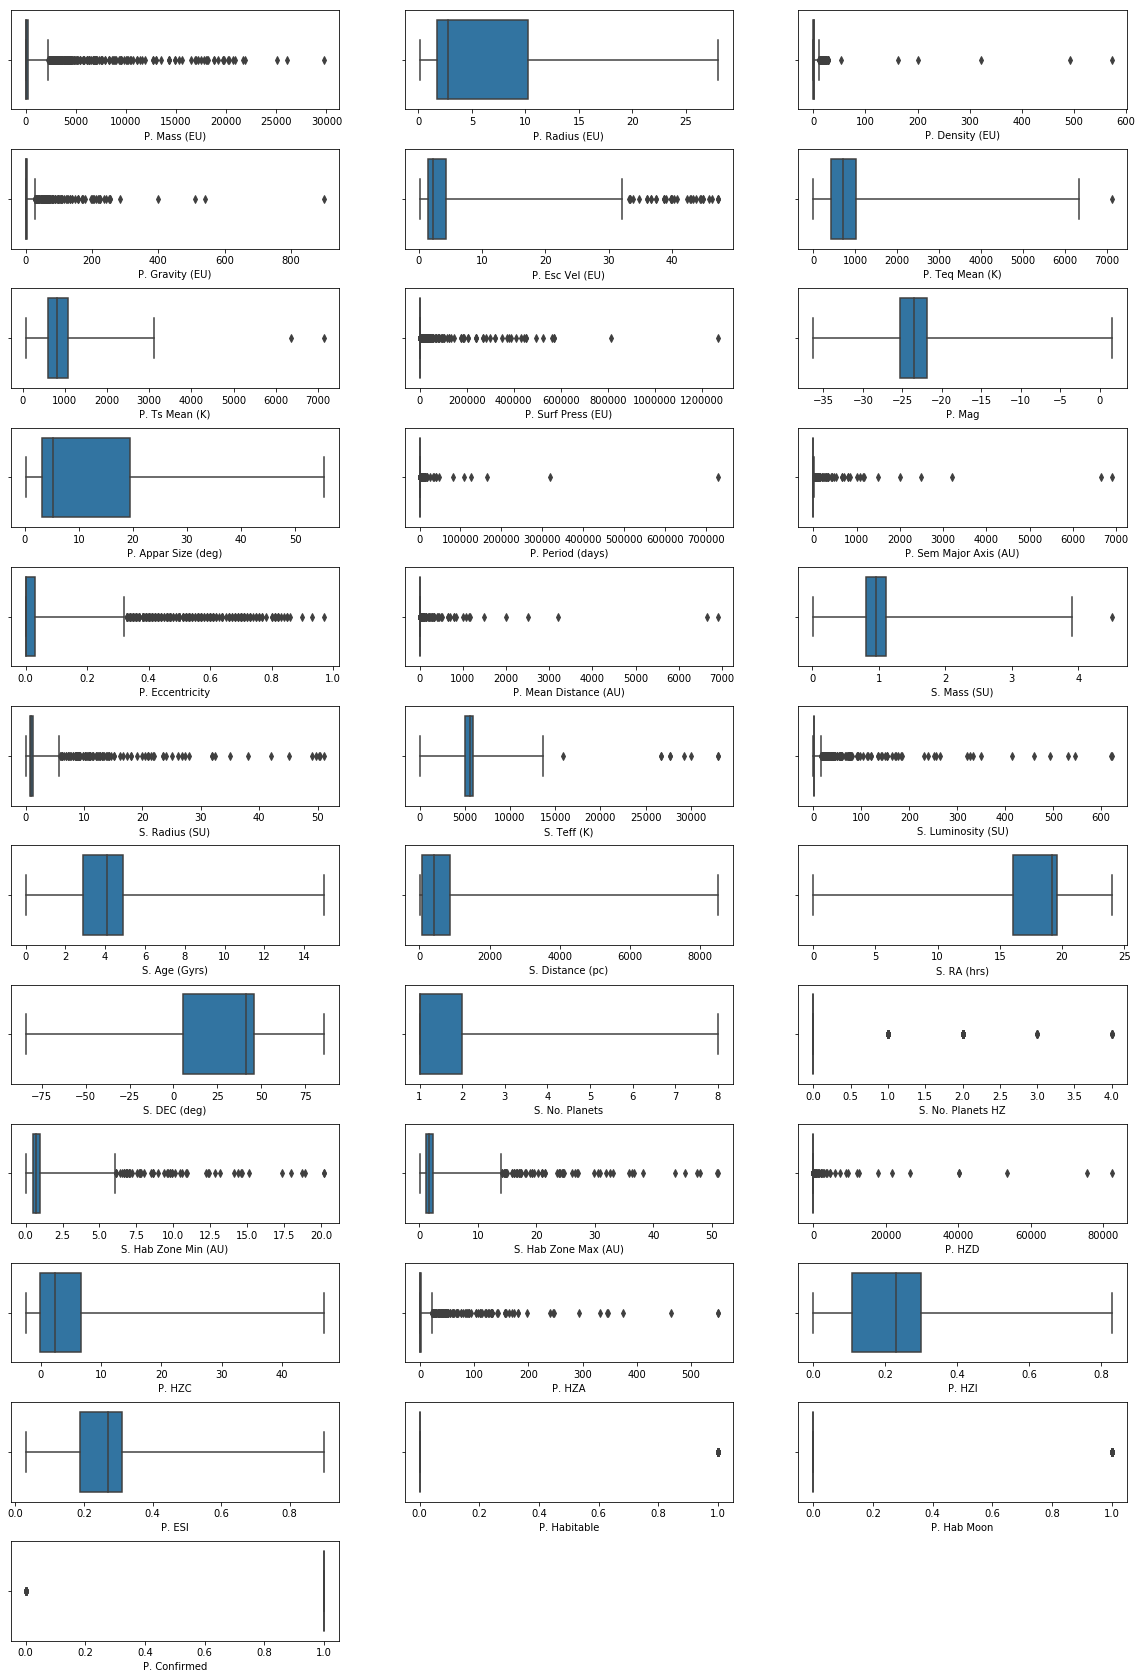

In [164]:
f = plt.figure(figsize=(20, 30))
i=1
import math
for col in phl_numeric.columns:
    subplot = f.add_subplot(math.ceil(phl_numeric.shape[1]/3),3,i)
    sns.boxplot(x=phl_numeric[col].dropna(),whis=10)
    i=i+1
plt.subplots_adjust(hspace=0.4)
plt.show()

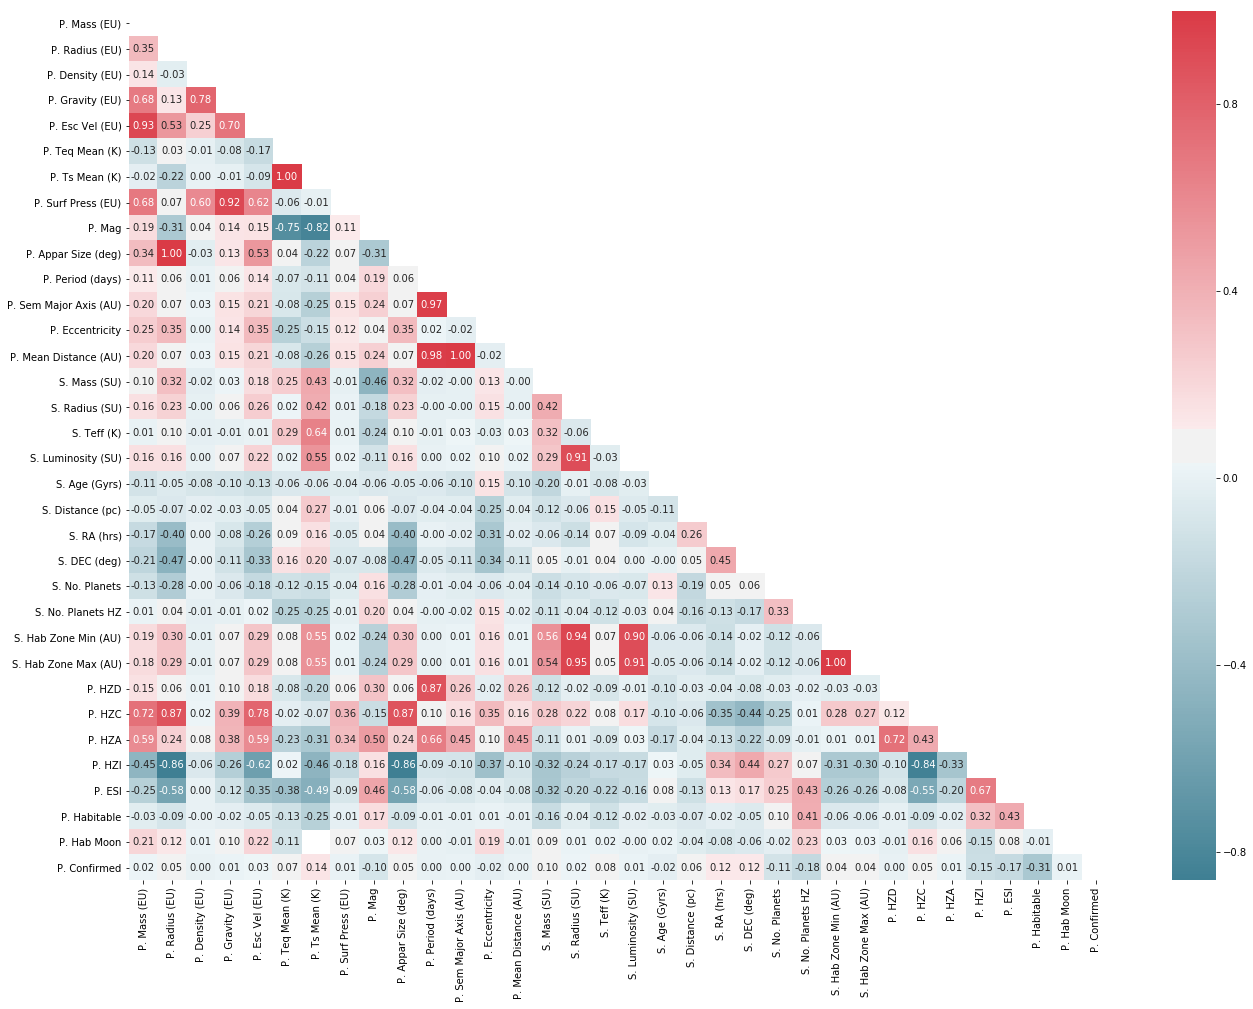

In [168]:
# High collinearity

corr = phl.corr()
fig, ax = plt.subplots(figsize=(22, 16))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True

sns.heatmap(corr, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, fmt=".2f", mask=mask)

In [166]:
phl.to_csv('datasets/phl_clean.csv', index=False)